In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
files.upload()
unemployment = pd.read_csv('Unemployment in India.csv',low_memory=False)

Saving Unemployment in India.csv to Unemployment in India.csv


In [4]:
#check the head of unemployment
unemployment.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


<Axes: >

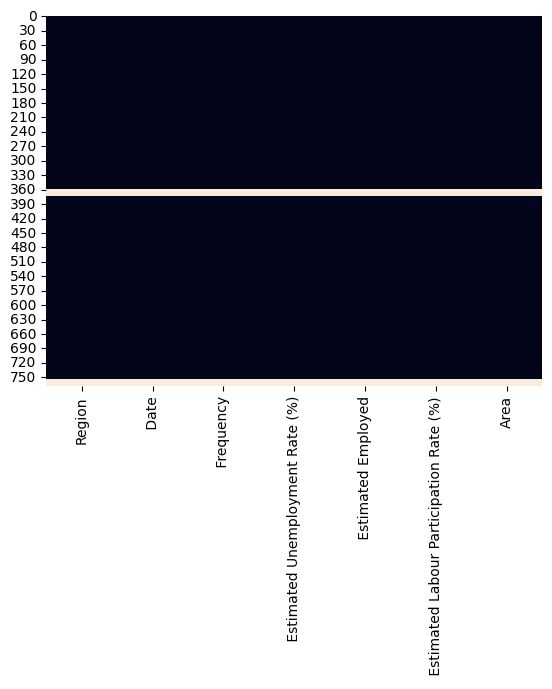

In [6]:
#now, we are checking start with a pairplot, and check for missing values
sns.heatmap(unemployment.isnull(),cbar=False)

In [11]:
unemployment.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [12]:
unemployment = unemployment.rename(columns={' Frequency': 'Frequency'})
unemployment = unemployment.rename(columns={' Estimated Unemployment Rate (%)': 'Estimated Unemployment Rate (%)'})
unemployment = unemployment.rename(columns={' Estimated Employed': 'Estimated Employed'})
unemployment = unemployment.rename(columns={' Estimated Labour Participation Rate (%)': 'Estimated Labour Participation Rate (%)'})

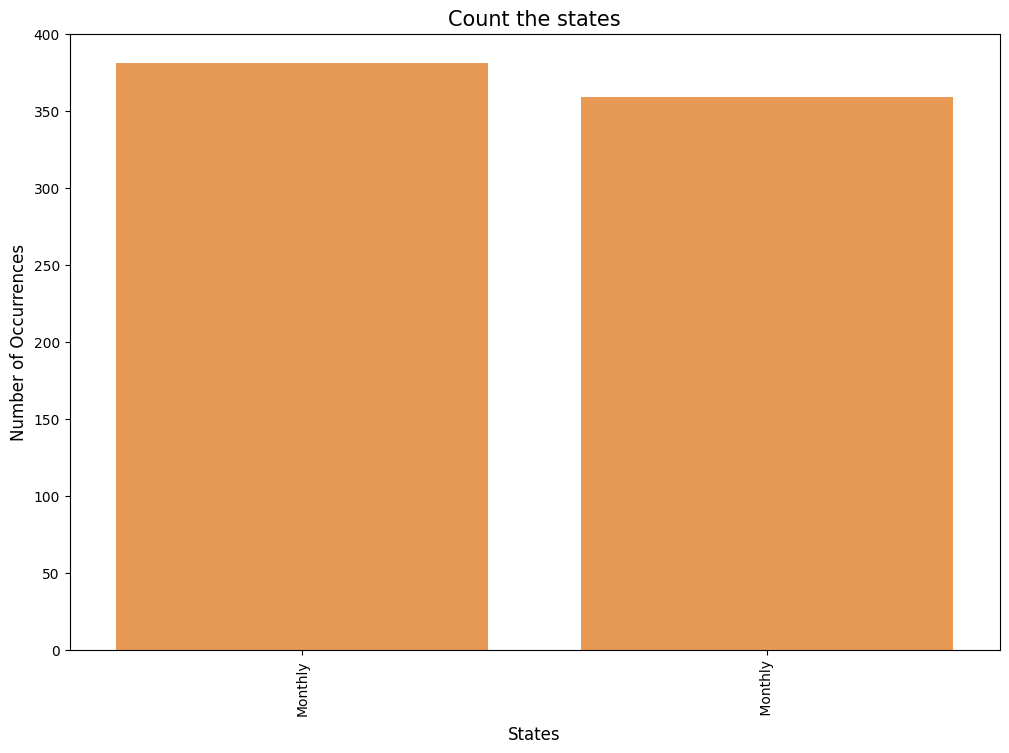

In [16]:
#Which state has the most unemployment
color = sns.color_palette()
cnt_srs = unemployment.Frequency.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('Count the states', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

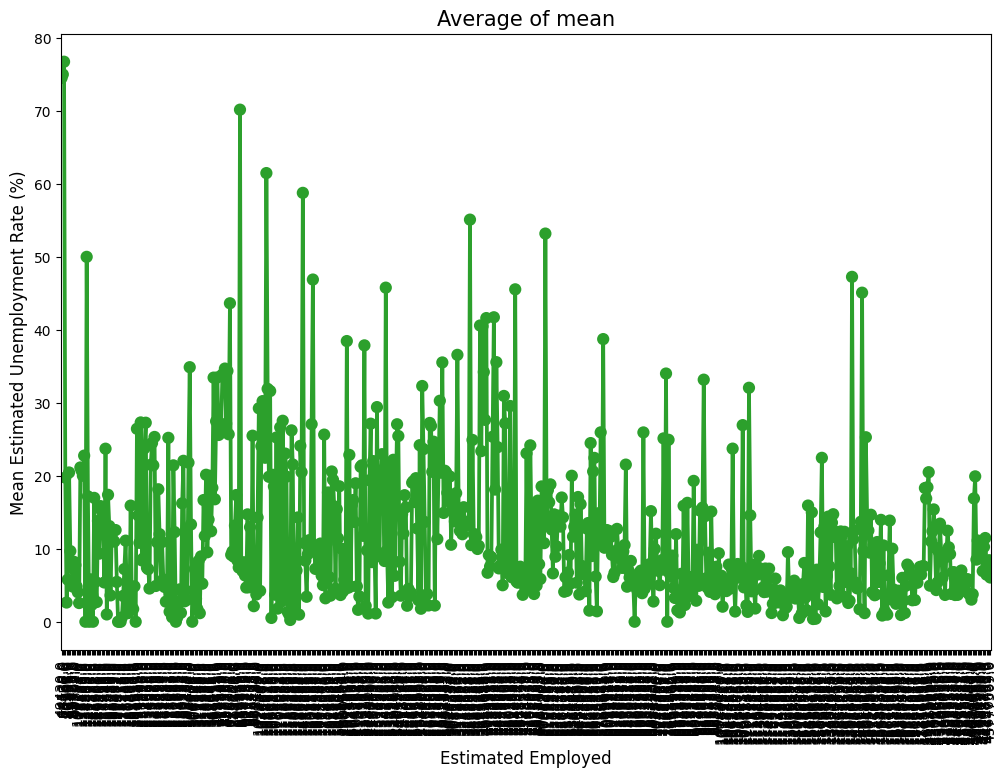

In [22]:
# take the mean of rate state by state
grouped_df = unemployment.groupby(["Estimated Employed"])["Estimated Unemployment Rate (%)"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['Estimated Employed'].values, y=grouped_df['Estimated Unemployment Rate (%)'].values, color=color[2])
plt.ylabel('Mean Estimated Unemployment Rate (%)', fontsize=12)
plt.xlabel('Estimated Employed', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
#see the number of unique states
unemployment.Frequency.nunique()

2

In [27]:
#See exact numbers
make_total = unemployment.pivot_table("Frequency",index=['Area'],aggfunc='mean')
topstate=make_total.sort_values(by='Area',ascending=False)[:47]
print(topstate)

Empty DataFrame
Columns: []
Index: [Urban, Rural]


<ipython-input-27-2b2ac217ec63>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  make_total = unemployment.pivot_table("Frequency",index=['Area'],aggfunc='mean')
